# Benchmarks: Nek5000 vs Nekbone

## Imports and helper function to read data

In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def readdata(fname, nelts=5, nx1s=18, nsamples=5):
    mean = np.zeros(nx1s)
    std = np.zeros(nx1s)
    nsample = np.zeros(nx1s)
    
    file = open(fname, 'r')
    jnk = file.readline()  # First line which conatin the format
    
    for nx1 in range(nx1s):
            tlist = []
            for j in range(nsamples):
                s = file.readline()
                tlist.append(float(s.split()[-1]))
            mean[nx1] = np.mean(tlist)
            std[nx1] = np.std(tlist)
            nsample[nx1] = (100*1.96*std[nx1]/(5*mean[nx1]))**2
        
    return mean, std, nsample

## Set a few variable values

In [3]:
minnx1 = 3
maxnx1 = 20
nx1s = maxnx1 - minnx1 + 1
nelts = 5
nprocs = 7
machine = 'DQ'

## Plots:

### Nek5000

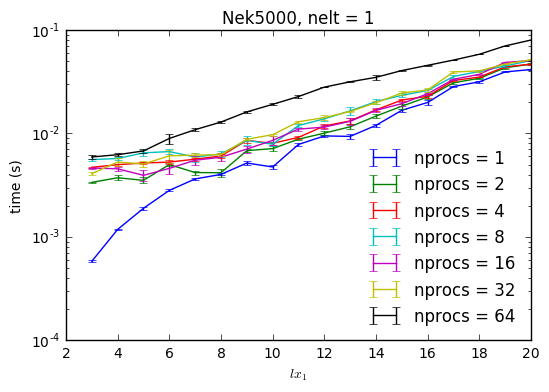

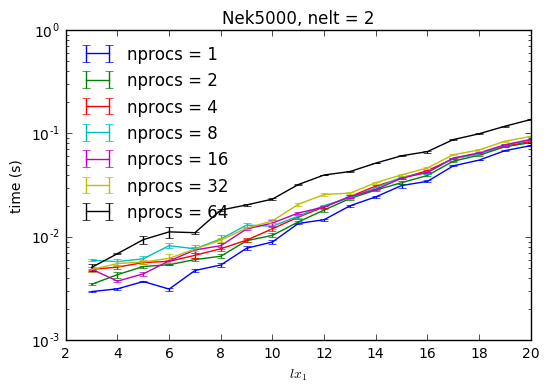

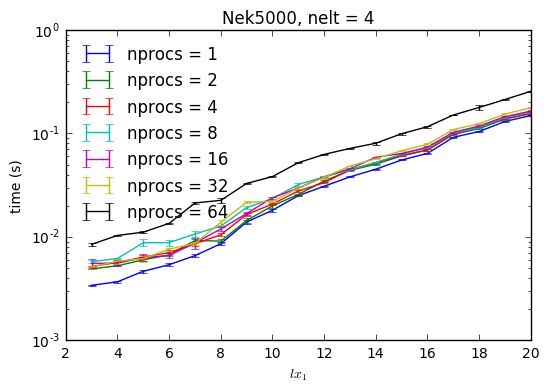

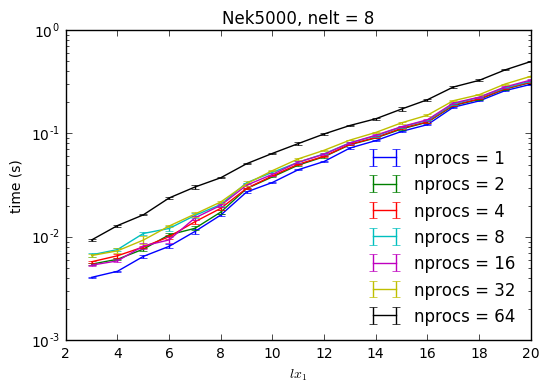

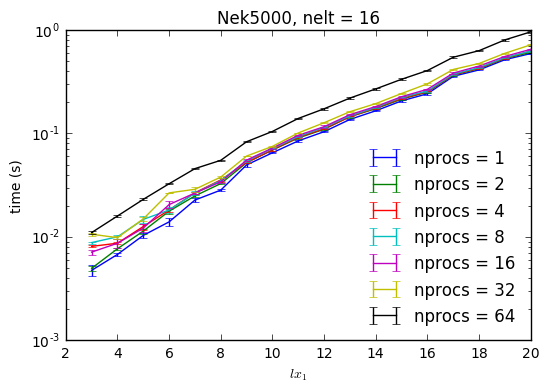

In [4]:
for n in range(nelts):
    plt.figure()
    for p in range(nprocs):
        fname = machine + '%02d' % (2**n) + 'P' + '%05d' % (2**p)
        
        meanNek5000, stdNek5000, nsampleNek5000 = readdata('data/' + fname,
                                                    nelts = nelts, nx1s = nx1s)

        plt.title('Nek5000, nelt = %d'% (2**n))
        plt.errorbar([i for i in range(minnx1, maxnx1+1)], meanNek5000, 
                     stdNek5000, label='nprocs = %d' % 2**p)
        plt.xlabel(r'$lx_1$')
        plt.ylabel('time (s)')
        plt.yscale('log')
        plt.legend(frameon=False, loc=0)

### Nekbone

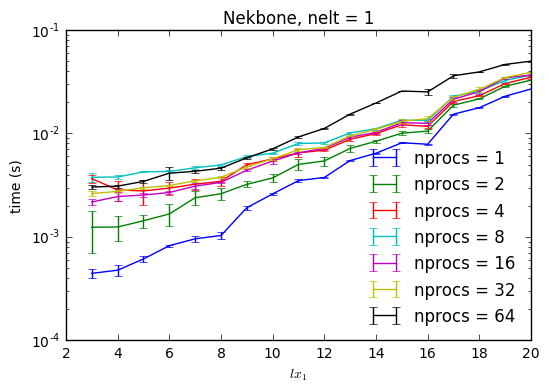

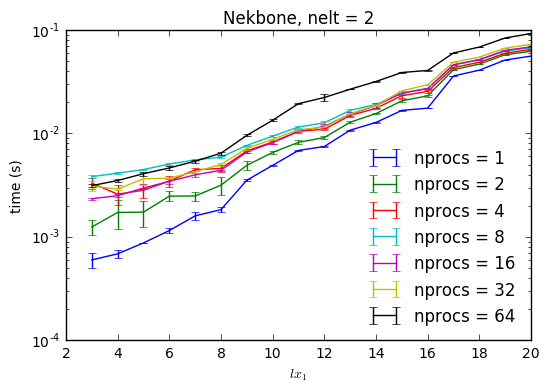

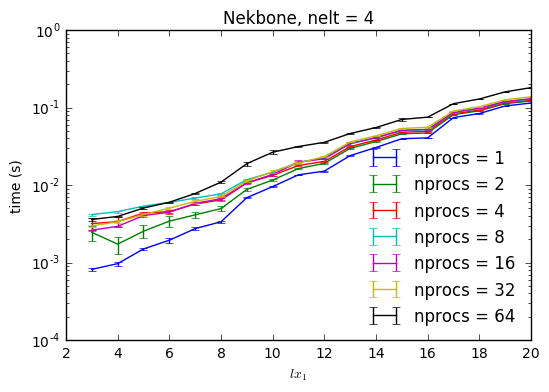

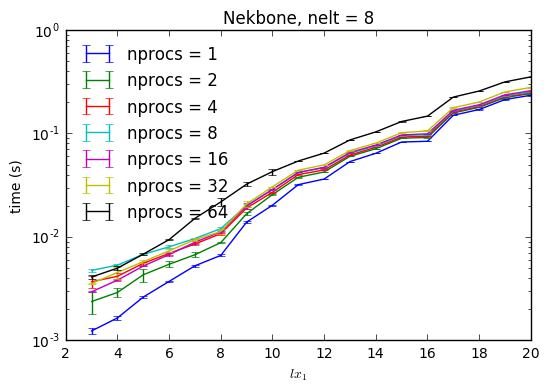

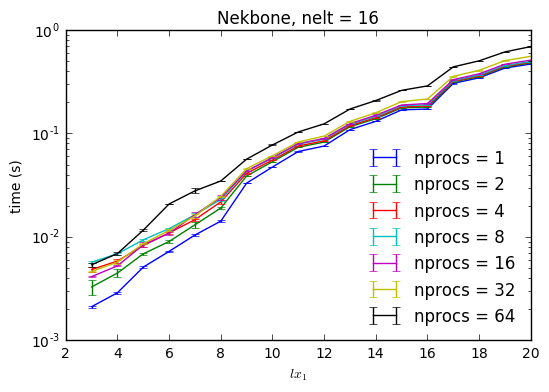

In [5]:
for n in range(nelts):
    plt.figure()
    for p in range(nprocs):
        fname = machine + '%02d' % (2**n) + 'P' + '%05d' % (2**p) +'.nekbone'
        
        meanNekbone, stdNekbone, nsampleNekbone = readdata('data/' + fname,
                                                    nelts = nelts, nx1s = nx1s)

        plt.title('Nekbone, nelt = %d'% (2**n))
        plt.errorbar([i for i in range(minnx1, maxnx1+1)], meanNekbone, 
                     stdNekbone, label='nprocs = %d' % 2**p)
        plt.xlabel(r'$lx_1$')
        plt.ylabel('time (s)')
        plt.yscale('log')
        plt.legend(frameon=False, loc=0)

## Comparison: Nek5000 vs Nekbone

/Users/thilina/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


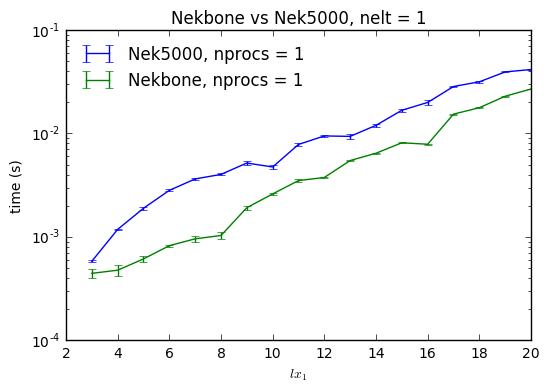

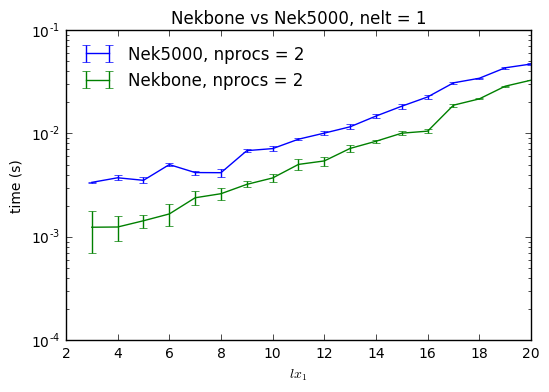

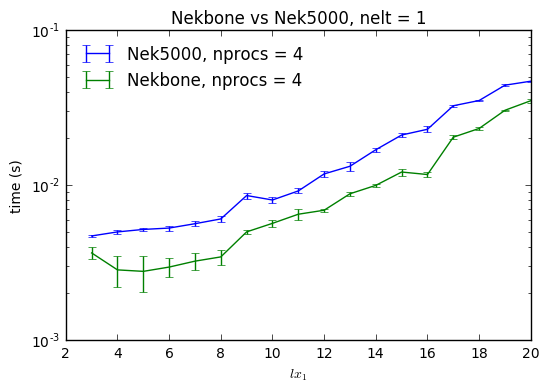

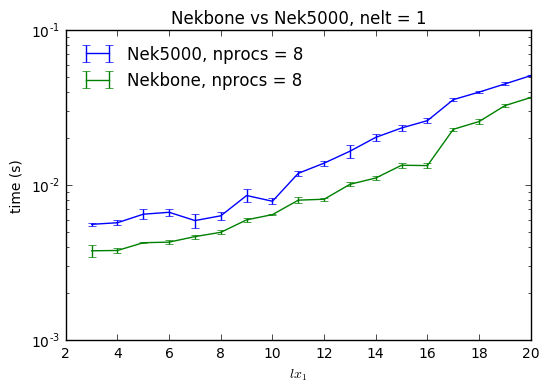

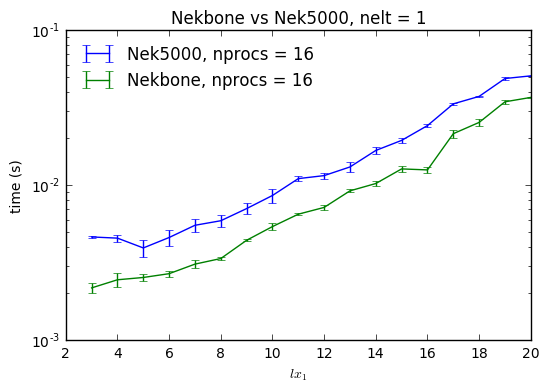

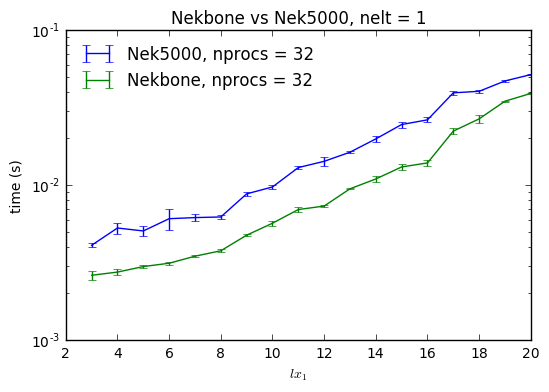

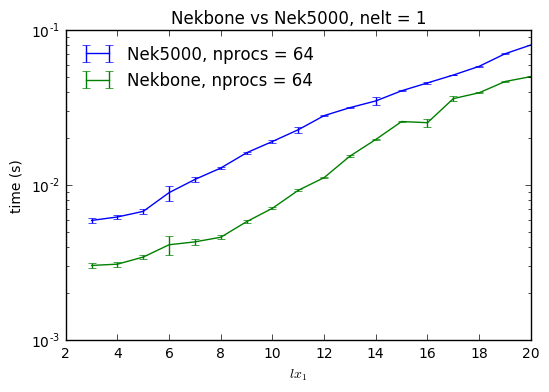

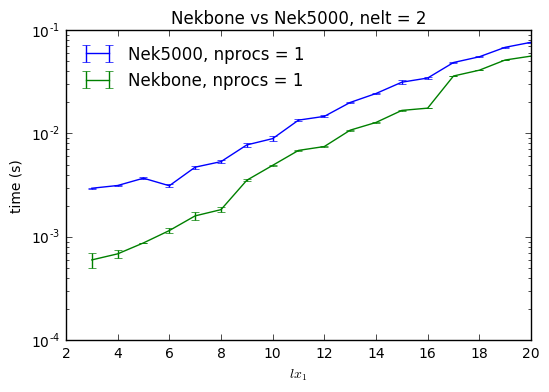

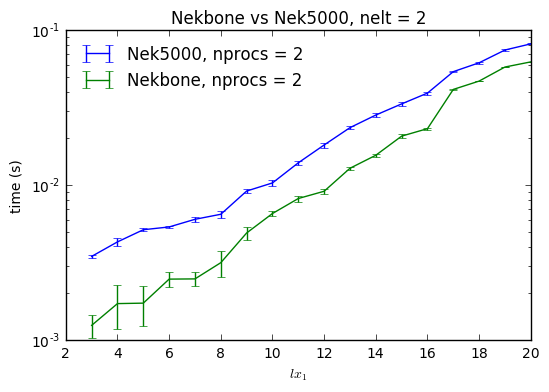

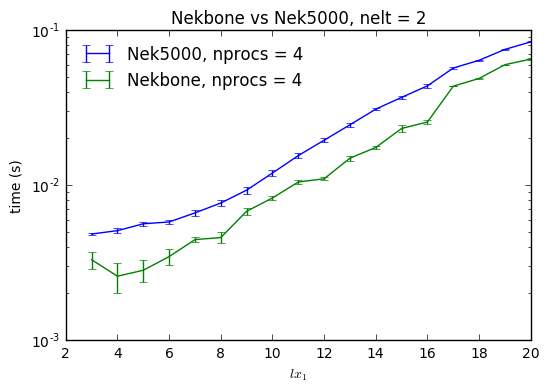

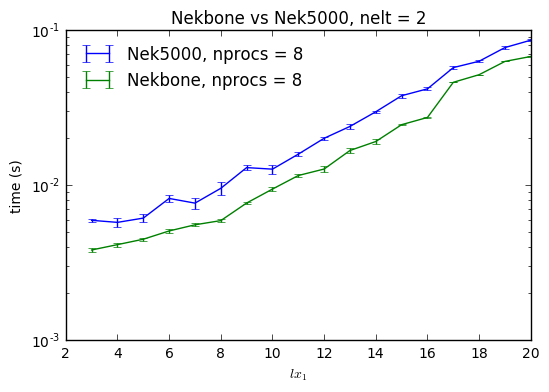

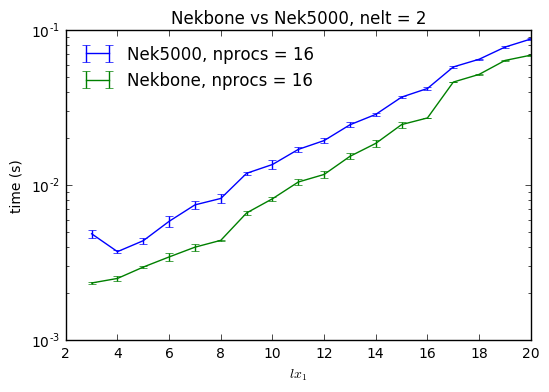

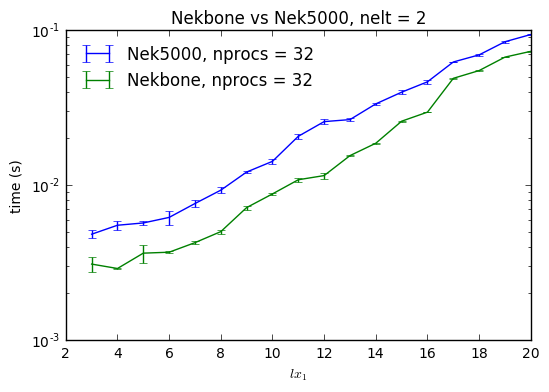

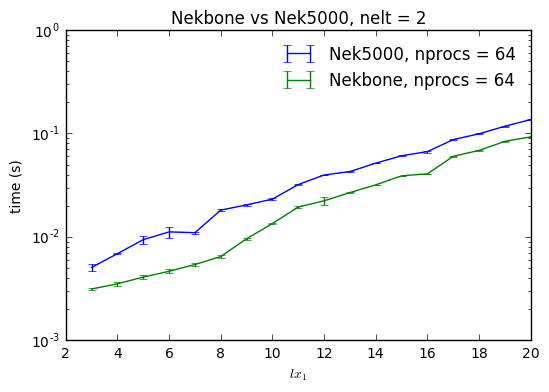

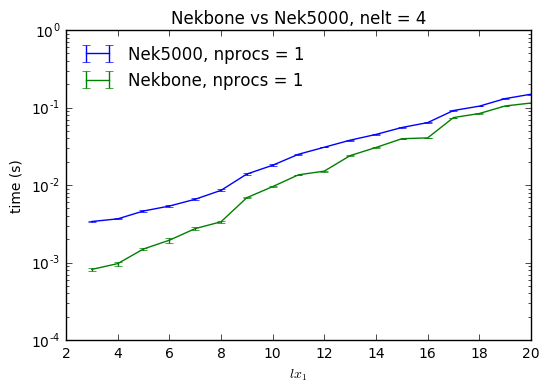

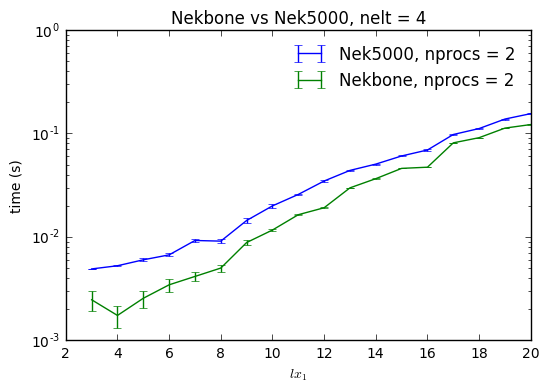

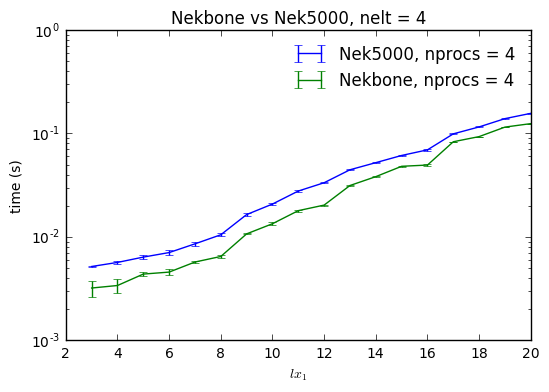

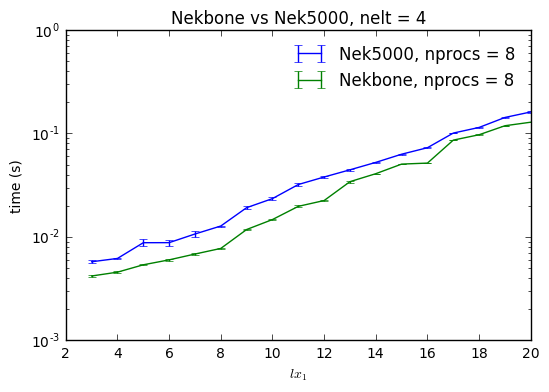

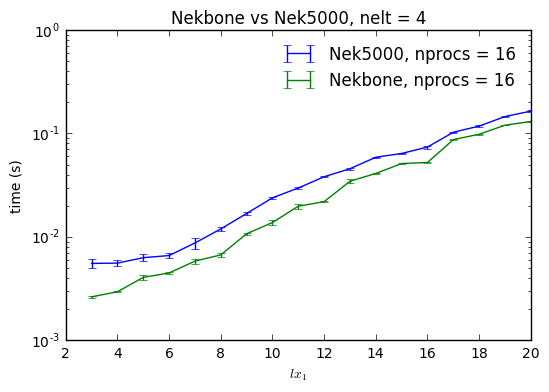

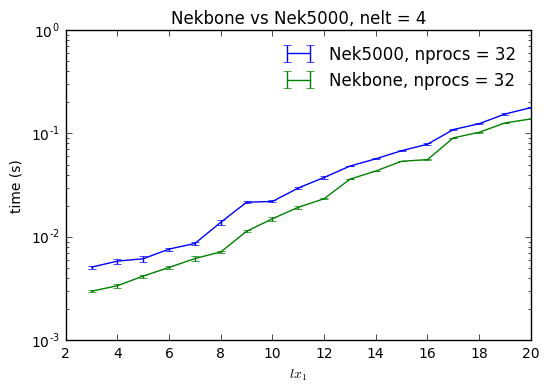

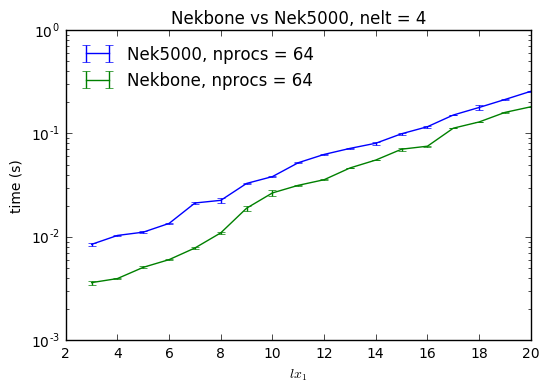

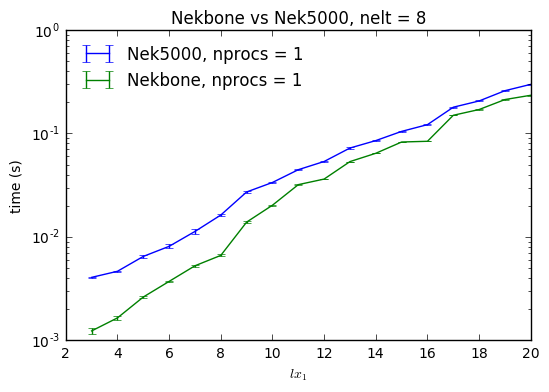

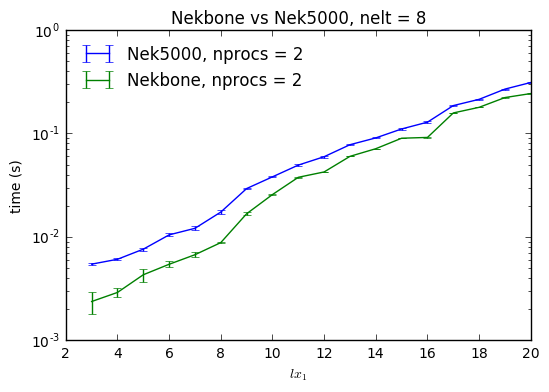

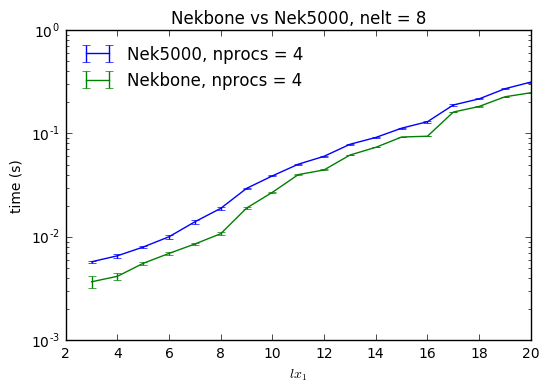

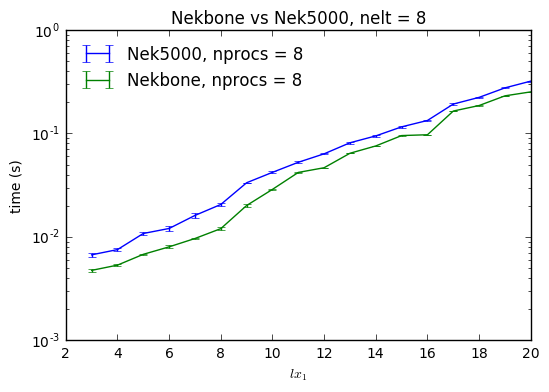

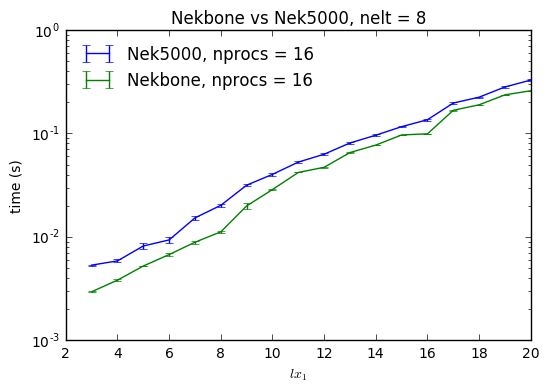

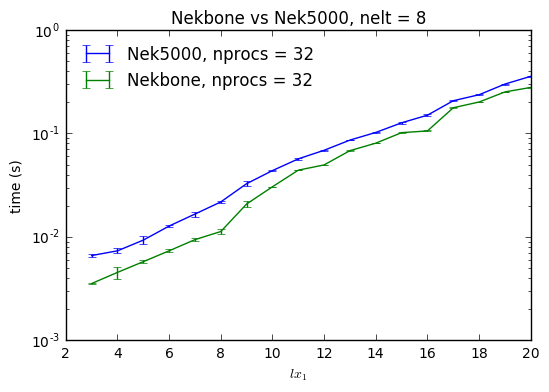

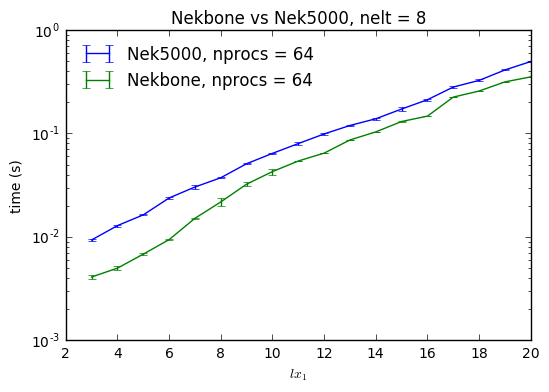

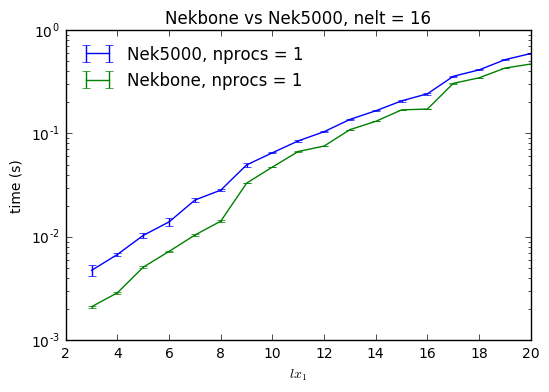

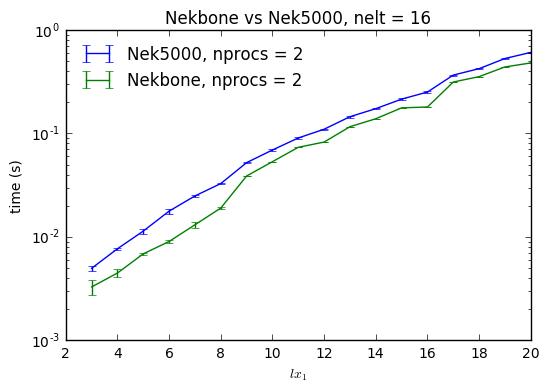

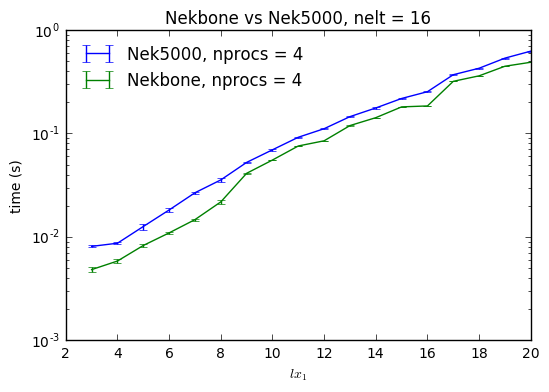

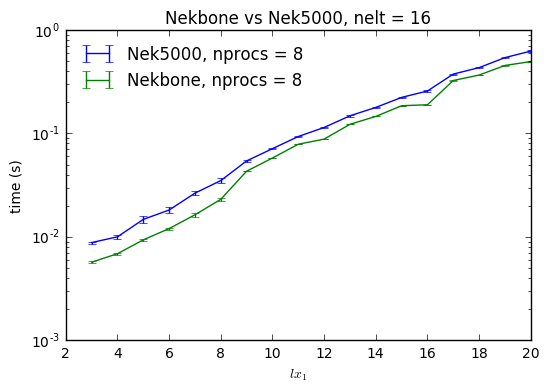

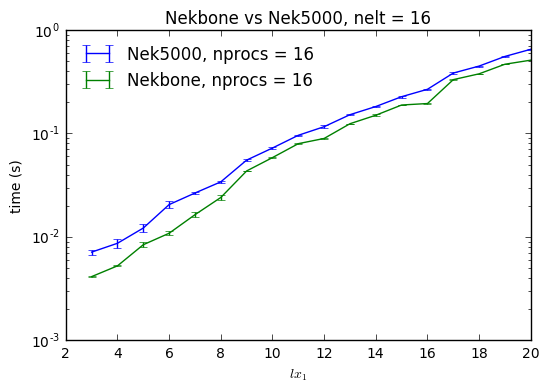

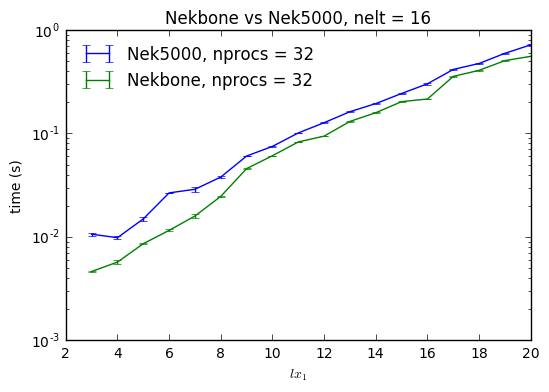

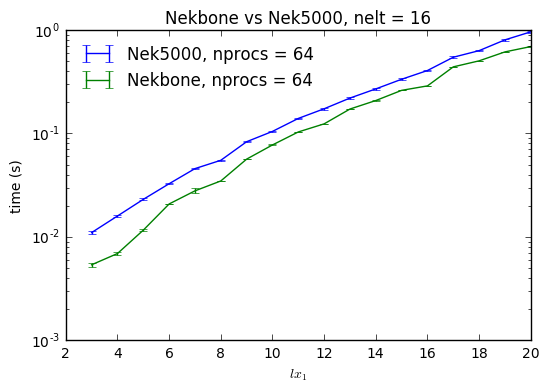

In [6]:
for n in range(nelts):
    for p in range(nprocs):
        plt.figure()
        plt.title('Nekbone vs Nek5000, nelt = %d'% (2**n))
        
        fname = machine + '%02d' % (2**n) + 'P' + '%05d' % (2**p)
        
        meanNek5000, stdNek5000, nsampleNek5000 = readdata('data/' + fname,
                                                    nelts = nelts, nx1s = nx1s)
        plt.errorbar([i for i in range(minnx1, maxnx1+1)], meanNek5000, 
                     stdNek5000, label='Nek5000, nprocs = %d' % 2**p)

        meanNekbone, stdNekbone, nsampleNekbone = readdata('data/' + fname + '.nekbone',
                                                    nelts = nelts, nx1s = nx1s)
        plt.errorbar([i for i in range(minnx1, maxnx1+1)], meanNekbone, 
                     stdNekbone, label='Nekbone, nprocs = %d' % 2**p)
        
        plt.xlabel(r'$lx_1$')
        plt.ylabel('time (s)')
        plt.yscale('log')
        plt.legend(frameon=False, loc=0)